In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Constants_and_functions as C

In [2]:
pd.options.display.max_rows = 7000 # number of displayed rows

# Temperature
T = pd.read_csv('HATPRO_temp.csv', sep=';', comment='#', header=0, names = C.Z, index_col=0, date_parser=pd.to_datetime) 
T = T['2019-05-23 00:00:00':'2019-05-23 09:00:00']

# Humidity
a = pd.read_csv('HATPRO_humidity.csv', sep=';', comment='#', header=0, names = C.Z, index_col=0, date_parser=pd.to_datetime) 
a = a*10**(-3) # to get kg/m^-3
a = a['2019-05-23 00:00:00':'2019-05-23 09:00:00']


In [3]:
# water vapour pressure
e = C.e(T,a) 

In [4]:
# pressure of dry air
p_d = pd.DataFrame(index = T.index, columns = T.columns)
DATA = pd.read_csv('data_TAWES_UIBK.csv', sep=';', comment='#', header=0, index_col=0, date_parser=pd.to_datetime)
DATA = DATA.iloc[::10,]
DATA = DATA[ '2019-05-23 00:00:00':'2019-05-23 09:02:00']
p_d[0] = 1000*10**2
#p_d[0] = DATA['p']*10**2 # initial condition # problem in pressure Data
for i in np.arange(1, len(p_d.columns)):
    p_d.iloc[:,i] = C.p_z2( p_d.iloc[:,i-1], p_d.columns[i-1], p_d.columns[i], T.iloc[:,i-1])

In [5]:
# mixing ratio
w = C.w(e,p_d)

In [6]:
# virtual Temperature
Tv = C.Tv(T,w)

In [7]:
# pressure
p = pd.DataFrame(index = T.index, columns = T.columns)
p[0] = 1000*10**2
#p[0] = DATA['p']*10**2 # initial condition # problem in pressure Data
for i in np.arange(1, len(p.columns)):
    p.iloc[:,i] = C.p_z2(p.iloc[:,i-1], p.columns[i-1], p.columns[i], Tv.iloc[:,i-1])

In [8]:
# potential Temperature
theta = C.Theta(T,p)

In [9]:
# Gradient of potential Temperature
Gradient = pd.DataFrame(index = T.index, columns = T.columns)
for i in np.arange(0, len(theta.columns)-1):
    Gradient.iloc[:,i] = (theta.iloc[:, i+1]- theta.iloc[:, i])/(theta.columns[i+1]-theta.columns[i])

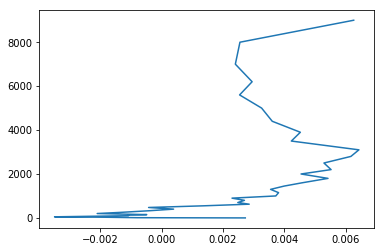

In [10]:
#plt.plot(theta.loc['2019-05-23 22:00:00'], theta.columns)
plt.plot(Gradient.loc['2019-05-23 09:00:00'], Gradient.columns);